<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220928.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [3]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone, timedelta 

import os
import re
from functools import reduce

# customer analysis

In [4]:
os.listdir()

['.config',
 'scanner_data.csv',
 '1_customers_dataset.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'test.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 '1_order_payments_dataset.csv',
 'sample_data']

In [5]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns = [a.lower() for a in df.columns ]
df.head()

,customerid,gender,age,annual income (k$),spending score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


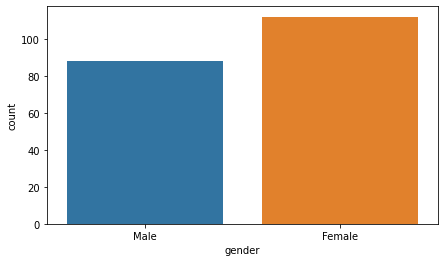

In [9]:
plt.figure(figsize = [7,4])
sns.countplot(x = 'gender', data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c4ca95990>]],
      dtype=object)

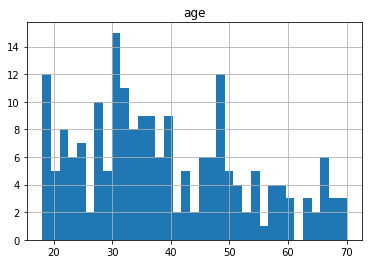

In [11]:
df.hist('age', bins = 35)

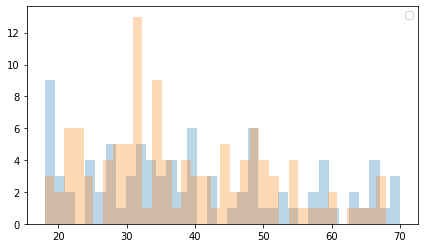

In [14]:
plt.figure(figsize = [7,4])
plt.hist('age', data = df[df.gender == 'Male'], alpha = .3, bins = 35)
plt.hist('age', data = df[df.gender == 'Female'], alpha = .3, bins = 35)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c4c963490>]],
      dtype=object)

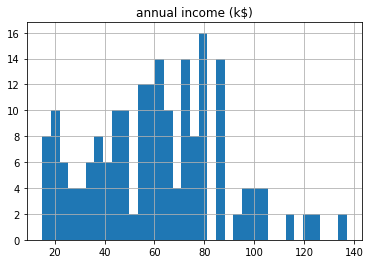

In [15]:
df.hist('annual income (k$)', bins = 35)

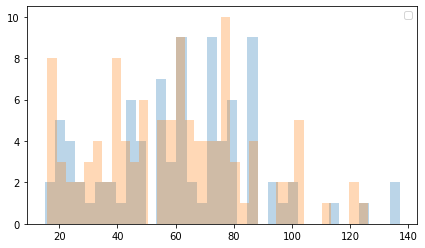

In [16]:
plt.figure(figsize = [7,4])
plt.hist('annual income (k$)', data = df[df.gender == 'Male'], alpha = .3, bins = 35)
plt.hist('annual income (k$)', data = df[df.gender == 'Female'], alpha = .3, bins = 35)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'income by gender')

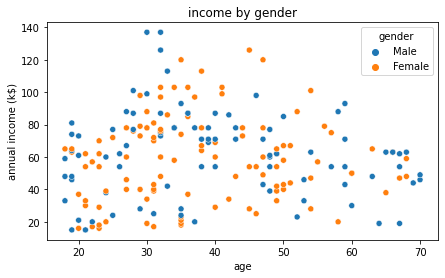

In [18]:
plt.figure(figsize = [7,4])
sns.scatterplot('age', 'annual income (k$)', hue = 'gender', data = df)
plt.title('income by gender')

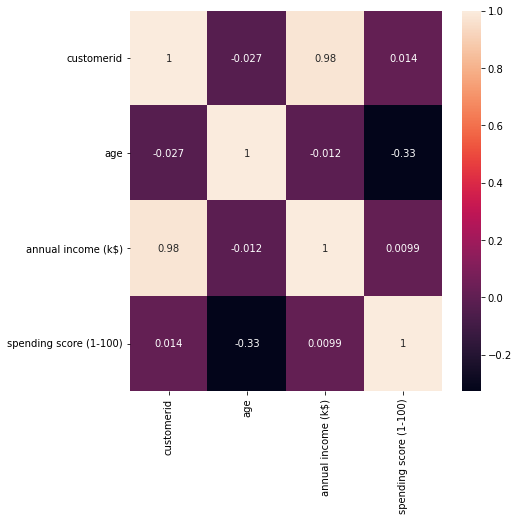

In [21]:
plt.figure(figsize = [7,7])
sns.heatmap(df.corr(), annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


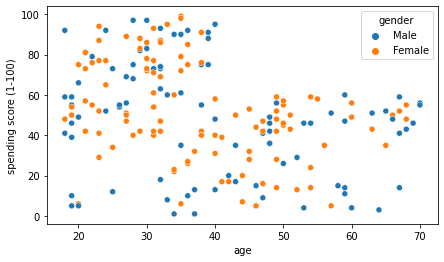

In [24]:
plt.figure(figsize = [7,4])
sns.scatterplot('age', 'spending score (1-100)', hue = 'gender', data = df)

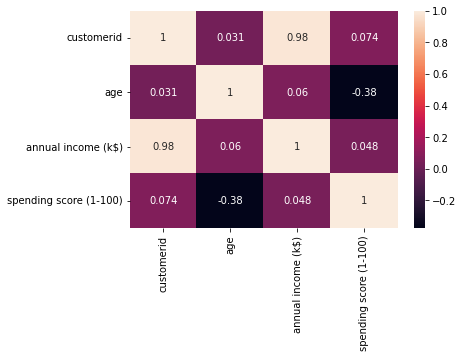

In [25]:
sns.heatmap(df[df.gender == 'Female'].corr(), annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Linear Regerssion by Gender')

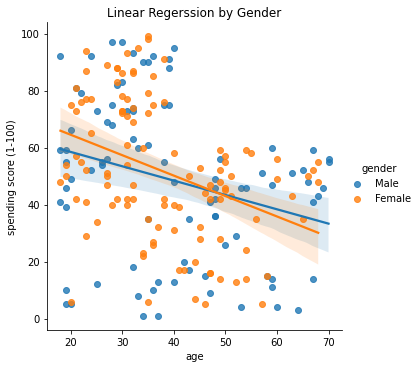

In [27]:
sns.lmplot('age', 'spending score (1-100)', hue = 'gender', data = df)
plt.title('Linear Regerssion by Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


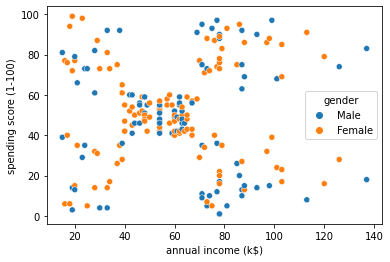

In [28]:
sns.scatterplot('annual income (k$)','spending score (1-100)', hue = 'gender', data = df)

# iterator

In [29]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letters : [r,c] for r, rows in enumerate(mat) for c, letters in enumerate(rows)}
a

{'A': [0, 0],
 'B': [0, 1],
 'C': [0, 2],
 'D': [1, 0],
 'E': [1, 1],
 'F': [1, 2],
 'G': [2, 0],
 'H': [2, 1],
 'I': [2, 2]}

In [30]:
arr = np.empty([3,3], dtype = 'object')
for k, v in a.items() :
  arr[v[0], v[1]] = k

arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)